# **EE6150: Assignment 6**

**Name:** Akash Reddy A <br>
**Roll Number:** EE17B001

## **Problem 1**

In [39]:
# Importing required packages

import numpy as np
import matplotlib.pyplot as plt

### (a)

**Note:** The average rate per hour at which customers leave can be calculated as: <br><br>
\begin{align}
\frac{\text{Number of customers that leave in a given simulation period}}{\text{Total duration of that simulation period}}
\end{align}

The average length of the queue (average number of customers waiting to be served) can be calculated as 

\begin{align}
\frac{\text{Length of queue between changes of queue length}\times\text{Inter-queue-change times}}{\text{Total duration of simulation period}}
\end{align}

In [40]:
## AUTOMATED SHOP

# Total no of hours simulated
sim_time = 2000

# Arrival rate of customers
arrival_rate = 20
# Service rate of the automated maker
service_rate1 = 10

# No of people in the automated system (including queue) - initialised to 0
system1 = 0
# No of people who have left without joining the queue - initialised to 0
left1 = 0

# Current time instant - starting at 0
current_time = 0
# List to store pairs of (queue length, time spent at that length)
queue_occupancy = []
# Money earned by selling pav-bhajis - starting at 0
income = 0

while True:
    # Break out of loop if the simulation time is crossed
    if current_time > sim_time:
        break

    # If the system is empty, always add an arrival (no service possible)
    # and shift the current time to the instant of arrival
    if system1 == 0:
        arrival_time = np.random.exponential(scale = 1/arrival_rate)
        current_time += arrival_time
        system1 += 1
    else:
        arrival_time = np.random.exponential(scale = 1/arrival_rate)
        ser_time = np.random.exponential(scale = 1/service_rate1)
        # If arrival time is lesser than service time, then add an arrival
        # (add to queue or leave based on given probability)
        # and shift current time to instant of arrival
        if arrival_time < ser_time:
            current_time += arrival_time
            queue_occupancy.append([system1-1, arrival_time])
            q_prob = np.random.uniform()
            if q_prob < min(system1/16, 1):
                left1 += 1
            else:
                system1 +=1
        # If service time is lesser than arrival time,
        # decrease system occupancy by 1, add income, and shift current time
        # to instant of completion of service
        else:
            current_time += ser_time
            queue_occupancy.append([system1-1, ser_time])
            system1 -= 1
            income += 5

print("AUTOMATED SHOP")
print()

# Calculation of rate of customers moving away
print("(i) Rate at which customers move away =", left1/sim_time)

# Using the pairs of queue lengths and time spent at those queue lengths,
# to calculate average number of customers waiting to be served
queue_occupancy = np.array(queue_occupancy)
print("(ii) Average no. of customers waiting =", 
      np.sum(np.prod(queue_occupancy, axis=1))/sim_time)

# Calculation of total profit = income per hour - charge of maker
print("(iii) Expected profit per hour =", income/sim_time - 40)

AUTOMATED SHOP

(i) Rate at which customers move away = 9.9355
(ii) Average no. of customers waiting = 7.001379050339743
(iii) Expected profit per hour = 9.840000000000003


In [41]:
## HUMAN SHOP

# Total no of hours simulated
sim_time = 2000

# Arrival rate of customers
arrival_rate = 20
# Service rate of each human maker
service_rate2 = 6

# No of people in the human shop (including queue) - initialised to 0
system2 = 0
# No of people who have left without joining the queue - initialised to 0
left2 = 0

# Current time instant - starting at 0
current_time2 = 0
# List to store pairs of (queue length, time spent at that length)
queue_occupancy2 = []
# Money earned by selling pav-bhajis - starting at 0
income2 = 0

while True:

    # Break out of loop if the simulation time is crossed
    if current_time2 > sim_time:
        break
    
    true_service_rate = 2*service_rate2
    # If there is exactly one person in the system, the effective service rate 
    # is the same as that of one human maker
    if system2 == 1:
        true_service_rate = service_rate2

    # If there's 2 or more people in the system, both human makers are
    # serving, therefore effective service time 
    # = min(exp(human1_rate), exp(human2_rate)) = exp(human1_rate + human2_rate)
    elif system2 > 1:
        true_service_rate = 2*service_rate2

    # Calculating an arrival and service time
    arrival_time = np.random.exponential(scale = 1/arrival_rate)
    ser_time = np.random.exponential(scale = 1/true_service_rate)

    # If system is empty or a second arrival comes when only one human maker
    # is occupied, the arrival is always added and current time is shifted
    if system2 == 0 or (system2 == 1 and arrival_time < ser_time):
        current_time2 += arrival_time
        # Joining queue or leaving based on given probability
        q_prob = np.random.uniform()
        if q_prob < min(system2/16, 1):
            left2 += 1
        else:
            system2 += 1
    else:
        # If arrival is faster than the effective service time, the arrival 
        # is added and current time is shifted
        if arrival_time < ser_time:
            current_time2 += arrival_time
            # Storing queue length (system-2), and corresponding times
            if system2 >= 2:
                queue_occupancy2.append([system2-2, arrival_time])
            # Joining queue or leaving based on given probability
            q_prob = np.random.uniform()
            if q_prob < min(system2/16, 1):
                left2 += 1
            else:
                system2 +=1
        # If a service happens before the next arrival, the system is 
        # decremented by 1, income is increased, and current time is shifted
        else:
            current_time2 += ser_time
            if system2 >= 2:
                queue_occupancy2.append([system2-2, ser_time])
            system2 -= 1
            income2 += 5

print("HUMAN SHOP")
print()   
# Calculation of rate of customers moving away
print("(i) Rate at which customers move away =", left2/sim_time)

# Using the pairs of queue lengths and time spent at those queue lengths,
# to calculate average number of customers waiting to be served
queue_occupancy2 = np.array(queue_occupancy2)
print("(ii) Average no. of customers waiting =", 
      np.sum(np.prod(queue_occupancy2, axis=1))/sim_time)

# Calculation of total profit = income per hour - charge of both makers
print("(iii) Expected profit per hour =", income2/sim_time - 2*40)

HUMAN SHOP

(i) Rate at which customers move away = 8.1695
(ii) Average no. of customers waiting = 4.603271456184635
(iii) Expected profit per hour = -21.119999999999997


### (b)

It would be better to have an automated shop, as the expected profit per hour is higher than the shop with human servers (assuming the goal is to maximise profit).

_____________________________________________________________________________________________

## **Problem 2**

**Note:** The average rate per hour at which calls are completed by a TA can be calculated as: <br><br>
\begin{align}
\frac{\text{60 minutes per hour}}{\text{Average length of call for a TA in minutes}}
\end{align}

In [42]:
# Importing required packages

import numpy as np
import matplotlib.pyplot as plt

In [43]:
def TAHelpline(arr_rate, impatient):    
    # Total no of hours simulated
    sim_time = 10000

    # Calculating rate of calls handled per hour based on average time to handle 
    # each call
    mean_calls_done_per_hr = 60/3

    # Arrival rate of calls
    arrival_rate = arr_rate

    # No of people in the calls + hold queue - initialised to 0
    system = 0

    # Current time instant - starting at 0
    current_time = 0
    # Number of people in hold queue - initialised to 0
    hold_queue = 0

    # List to store queue length as time progresses
    queue_lengths = []

    # List to store arrival times of students who get enqueued
    queue_arrival_times = []
    # List to store wait times of these enqueued students
    wait_times = []

    # List to store pairs of (queue length, time spent at that length)
    queue_occupancy = []

    # Time for which queue has more than 5 people - initialised to 0
    more_than_five_people_time = 0

    while True:

        # Break out of loop if the simulation time is crossed
        if current_time > sim_time:
            break

        # If system has more than 2 people, hold queue has system-2 people
        # Else, it has 0 people
        hold_queue = max(0, system-2)
        # Storing queue length
        queue_lengths.append(hold_queue)

        true_service_rate = 2*mean_calls_done_per_hr
        # If there is only 1 student in the system, he/she is being handled by
        # 1 TA while the other is idle - service rate = service rate of 1 TA
        if system == 1:
            true_service_rate = mean_calls_done_per_hr
        # If there are 2 or more students in the system, 2 of them are being handled 
        # by 1 TA each - effective service rate = service rate of both TAs combined
        # = sum of service rates
        elif system > 1:
            true_service_rate = 2*mean_calls_done_per_hr

        # Calculating an arrival and service time
        arrival_time = np.random.exponential(scale = 1/arrival_rate)
        ser_time = np.random.exponential(scale = 1/true_service_rate)

        # If system is empty or a second arrival comes when only one TA
        # is occupied, the arrival is always added and current time is shifted
        if system == 0 or (system == 1 and arrival_time < ser_time):
            current_time += arrival_time
            system += 1
        else:
            # If arrival is faster than the effective service time, the arrival 
            # is added and current time is shifted
            if arrival_time < ser_time:
                current_time += arrival_time
                # If system has atleast 2 people, new student enters queue, and 
                # his/her hold time starts
                if system >= 2:
                    queue_arrival_times.append(current_time)
                    queue_occupancy.append([system-2, arrival_time])
                # If system has > 7 people, queue has > 5 people
                if system > 7:
                    more_than_five_people_time += arrival_time
                system +=1
            # If a service happens before the next arrival, the system is 
            # decremented by 1 and current time is shifted
            else:
                current_time += ser_time
                # If system has >2 people, queue has atleast 1 person whose hold
                # time ends
                if system > 2:
                    wait_times.append(current_time - queue_arrival_times[0])
                    queue_arrival_times.pop(0)
                    queue_occupancy.append([system-2, ser_time])
                # If system has > 7 people, queue has > 5 people
                if system > 7:
                    more_than_five_people_time += ser_time
                system -= 1

        # Removing the students who have been waiting more than 5 minutes
        # if we consider the "impatient" model
        if impatient==True:
            while True:
                student = 0
                if student < len(queue_arrival_times):
                    if (current_time - queue_arrival_times[student] > 5/60):
                        queue_arrival_times.pop(student)
                        system -= 1
                    else:
                        break
                else:
                    break

    # Plotting the queue lengths to check the maximum arrival rate beyond which
    # an extra TA is needed (beyond this rate, queue length blows up)
    # plt.plot(queue_lengths)
    # plt.show()

    # Calculating expected hold time for students
    expected_hold_time = np.mean(wait_times)*60
    # Calculating fraction of time for which queue has more than 5 people
    percentage_more_than_five = more_than_five_people_time/sim_time*100

    # Calculating expected length of hold queue in the "impatient" model
    queue_occupancy = np.array(queue_occupancy)
    expected_queue_length = np.sum(np.prod(queue_occupancy, axis=1))/sim_time

    return queue_lengths, expected_hold_time, percentage_more_than_five, expected_queue_length

###(a)

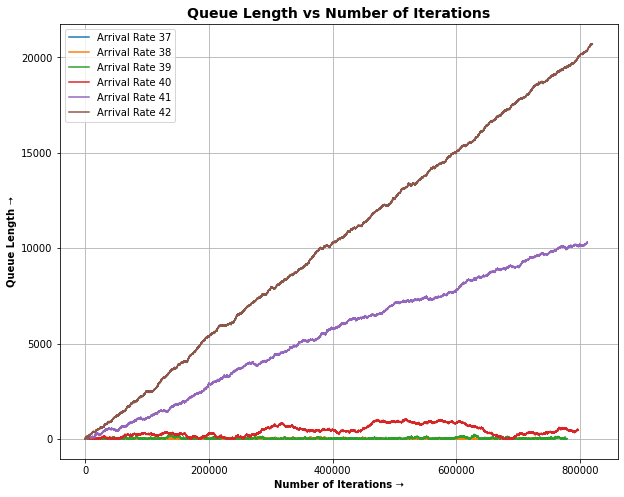

In [44]:
# Plotting the progression of queue length with time for various arrival rates

plt.figure(figsize=(10,8))
for arrival_rate in range(37, 43):
    queue_lengths,_,_,_ = TAHelpline(arrival_rate, impatient=False)
    plt.plot(queue_lengths, label = f"Arrival Rate {arrival_rate}")
plt.legend()
plt.grid(True)
plt.title("Queue Length vs Number of Iterations", fontweight = 'bold', 
          fontsize = 14)
plt.xlabel("Number of Iterations \u279d", fontweight = 'bold')
plt.ylabel("Queue Length \u279d", fontweight = 'bold')
plt.show()

- We observe that the queue blows up for arrival rates $>40$.
- Therefore, **the highest arrival rate that two TAs can handle is $40$**. At $40$, the queue is in equilibrium. For arrival rates $< 40$, the queue always tends to decrease in size since the TAs are faster than the arrivals.
- This matches up with what we expect. Since there are two TAs, for higher arrival rates, both of them are almost always catering to a student. Therefore, the effective service time of the queue ~$ min\{exp(20), exp(20)\} = exp(40)$. When the arrival rate equals this, the queue is in equilibrium and the TAs cannot handle faster arrivals than this.

###(b)

####(i)

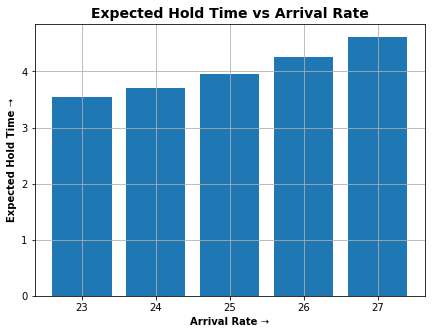

In [45]:
# Plotting expected hold time as arrival rate increases

plt.figure(figsize=(7,5))
xaxis, yaxis = [], []
for arrival_rate in range(23, 28):
    _,expected_hold_time,_,_ = TAHelpline(arrival_rate, impatient=False)
    xaxis.append(arrival_rate)
    yaxis.append(expected_hold_time)
plt.bar(xaxis, yaxis)
plt.grid(True)
plt.title("Expected Hold Time vs Arrival Rate", fontweight = 'bold', 
          fontsize = 14)
plt.xlabel("Arrival Rate \u279d", fontweight = 'bold')
plt.ylabel("Expected Hold Time \u279d", fontweight = 'bold')
plt.show()

- For a highest arrival rate of $24$, the expected hold time is consistently below 4 minutes.
- For arrival rate $25$, the expected hold time is very close to 4 minutes and sometimes higher than 4 minutes.

- **Therefore, the largest arrival rate reported for an expected hold time below 4 minutes is $24$.**

####(ii)

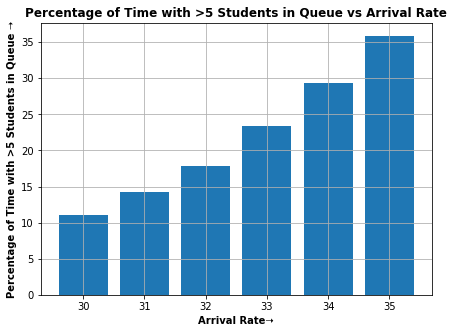

In [46]:
# Plotting percentage of time with >5 in queue as arrival rate increases

plt.figure(figsize=(7,5))
xaxis, yaxis = [], []
for arrival_rate in range(30, 36):
    _,_,percentage_more_than_five,_ = TAHelpline(arrival_rate, impatient=False)
    xaxis.append(arrival_rate)
    yaxis.append(percentage_more_than_five)
plt.bar(xaxis, yaxis)
plt.grid(True)
plt.title("Percentage of Time with >5 Students in Queue vs Arrival Rate", 
          fontweight = 'bold', fontsize = 12)
plt.xlabel("Arrival Rate\u279d", fontweight = 'bold')
plt.ylabel("Percentage of Time with >5 Students in Queue \u279d", 
           fontweight = 'bold')
plt.show()

- **The largest arrival rate with a percentage of time for which more than 5 people are in the hold queue, is less than $20\%$, is $32$.**

###(c)

In [47]:
# Calculating expected queue length for "impatient" model for arrival rate = 20

_,_,_,expected_queue_length = TAHelpline(arr_rate=20, impatient=True)
print("Expected queue length in the impatient model =", expected_queue_length)

Expected queue length in the impatient model = 0.2493105890427375


The above answer checks out as there are two TAs who can potentially handle 1 call every 3 minutes - creating a system with double the handling rate. Therefore, the system can potentially handle a call every 1.5 minutes.

However, an arrival rate of 20 indicates, on average, an arrival every 3 minutes. The system handles calls faster than the queue can build up. Additionally, the expected queue length is further decreased because the students waiting for $>5$ minutes leave. 

Therefore, the expected queue length is kept small.

__________________________________________________________

## **Problem 3**

In [48]:
# Importing required packages

import numpy as np
import matplotlib.pyplot as plt

In [49]:
def payLess(thres):
    # Total no of hours simulated
    sim_time = 10000

    # Arrival rate of tables occupying
    arrival_rate = 11
    # Service rate of each waiter
    service_rate = 7

    # Number of tables occupied - starting at 0
    tables_occupied = 0
    # Number of waiters occupied (out of 2) - starting at 0
    waiters_occupied = 0

    # The threshold of no. of occupied tables at which second waiter starts working
    second_waiter_threshold = thres

    # Current time instant - starting at 0
    current_time = 0

    # The time for which second waiter is on duty
    second_waiter_dutytime = 0

    # List to store pairs of (no. of tables occupied, time spent at that number)
    tables_occupancy = []

    while True:

        # Break out of loop if the simulation time is crossed
        if current_time > sim_time:
            break

        # If number of tables occupied is below the second waiter threshold or
        # if only 1 table is occupied, only one waiter is working
        # - service rate = service rate of 1 waiter
        if tables_occupied < second_waiter_threshold or tables_occupied <= 1:
            true_service_rate = service_rate
        # Else, both waiters are working - effective service rate = sum of 
        # individual service rates of waiters
        else:
            true_service_rate = 2*service_rate

        # Calculating an arrival and a service time
        arrival_time = np.random.exponential(scale = 1/arrival_rate)
        ser_time = np.random.exponential(scale = 1/true_service_rate)

        # If the restaurant is empty or the no. of tables occupied is 1 less than
        # the second waiter threshold and an arrival occurs before a service,
        # then the arrival is always immediately taken care of by a waiter,
        # and one extra waiter (first or second respectively) gets occupied
        if tables_occupied == 0 or (tables_occupied == second_waiter_threshold-1 
                                    and arrival_time < ser_time):
            current_time += arrival_time
            waiters_occupied += 1
            tables_occupancy.append([tables_occupied, arrival_time])
            tables_occupied += 1
        else:
            # If the arrival is faster than the service time, it gets added to
            # the tables occupied, and the current time is shifted
            if arrival_time < ser_time:
                current_time += arrival_time
                # If second waiter is also occupied, total on-duty time of second 
                # waiter is updated
                if waiters_occupied == 2:
                    second_waiter_dutytime += arrival_time
                tables_occupancy.append([tables_occupied, arrival_time])
                tables_occupied +=1
            else:
                # If the service is faster than the arrival, the tables occupied
                # decreases by 1, and the current time is shifted
                current_time += ser_time
                tables_occupancy.append([tables_occupied, ser_time])
                # If second waiter is occupied in this service time, total on-duty 
                # time of second waiter is updated
                if waiters_occupied == 2:
                    second_waiter_dutytime += ser_time
                # If the service takes no. of occupied tables below the second 
                # waiter threshold, or from 2 to 1, then only 1 waiter continues to
                # be occupied
                if tables_occupied <= max(2, second_waiter_threshold):
                    waiters_occupied = 1
                # If the service takes no. of occupied tables from 1 to 0, 
                # then no waiter continues to be occupied
                if tables_occupied == 1:
                    waiters_occupied = 0
                tables_occupied -= 1


    # Fraction of time for which second waiter is on duty
    second_waiter_duty_fraction = second_waiter_dutytime/sim_time

    # Expected number of tables occupied
    tables_occupancy = np.array(tables_occupancy)
    expected_tables_occupied = np.sum(np.prod(tables_occupancy, axis=1))/sim_time
    
    return second_waiter_duty_fraction, expected_tables_occupied

###(a), (b)

In [50]:
# Calculating fraction of time second waiter is on duty, and expected no. of tables occupied
# for a second waiter of threshold of 3 that is given in the question

second_waiter_duty_fraction, expected_tables_occupied = payLess(thres = 3)

print("Fraction of time that the second waiter is on duty =", 
      second_waiter_duty_fraction)
print("Expected number of tables occupied =", expected_tables_occupied)

Fraction of time that the second waiter is on duty = 0.6377465893117362
Expected number of tables occupied = 4.555711498437237


###(c)

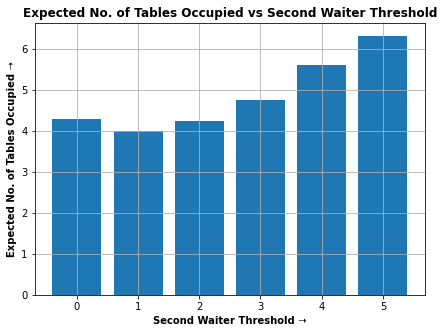

In [51]:
# Plotting expected number of tables occupied as second waiter threshold increases

plt.figure(figsize=(7,5))
xaxis, yaxis = [], []
for th in range(0, 6):
    _, expected_tables_occupied = payLess(thres = th)
    xaxis.append(th)
    yaxis.append(expected_tables_occupied)

plt.bar(xaxis, yaxis)
plt.grid(True)
plt.title("Expected No. of Tables Occupied vs Second Waiter Threshold", 
          fontweight = 'bold', fontsize = 12)
plt.xlabel("Second Waiter Threshold \u279d", fontweight = 'bold')
plt.ylabel("Expected No. of Tables Occupied \u279d", fontweight = 'bold')
plt.show()

- For a second waiter threshold of $3$ tables, we have already seen from part $(b)$ that the expected number of tables occupied is lesser than $5$. This is confirmed from the bar plot above.
- This is in fact the highest threshold for which this is possible, since for a second waiter threshold of $4$ tables or higher, the expected number of tables occupied is $>5$.

- **Therefore, the second waiter should go on duty whenever a minimum of 3 tables (or lesser) are occupied to keep the expected number of tables occupied below 5.**

_________________________________________________________________

## **Problem 4**

In [52]:
import numpy as np
import matplotlib.pyplot as plt

In [53]:
def idli(waiters_out, waiters_in):
    # Total no of hours simulated
    sim_time = 30000

    # Arrival rate of inside customers
    arrival_rate_in = 60/10
    # Arrival rate of outside customers
    arrival_rate_out = 60/15

    # Service time mean and std. dev of outside waiters
    service_mean_out = 3/60
    service_stdev_out = 1/60

    # Service time mean and std. dev of inside waiters
    service_mean_in = 5/60
    service_stdev_in = 1/60

    # Number of customers outside and inside - starting at 0
    system_out = 0
    system_in = 0

    # Upper limit of customers in outside system 
    # = no. of waiters + 3 extra in each queue of each window
    limit_out = waiters_out + 3*waiters_out

    # Current time instant - starting at 0
    current_time = 0

    # Lists to store the arrival times of outside and inside customers
    arrivals_out = []
    arrivals_in = []
    # Lists to store the service times of outside and inside customers
    service_times_out = []
    service_times_in = []

    # Lists to store the arrival times of customers transiting from outside to
    # inside upon finding the outside system to be full
    arrival_transit = []

    while True:

        # Break out of loop if the simulation time is crossed
        if current_time > sim_time:
            break
        
        # Calculating outside and inside arrival times
        arrival_time_out = np.random.exponential(scale = 1/arrival_rate_out)
        arrival_time_in = np.random.exponential(scale = 1/arrival_rate_in)

        # Calculating outside and inside service times

        # If number of customers < number of waiters, effective service time =
        # min of service times of no. of WORKING outside waiters
        # Putting a lower limit of 1e-8 on service time so that it does not go to < 0
        if system_out < waiters_out:
            waiter_out_times = np.random.normal(loc = service_mean_out, 
                                                scale = service_stdev_out, 
                                                size = max(1,system_out))
            ser_time_out = max(1e-8, min(waiter_out_times))
        # Else, all outside waiters are working, effective service time = min
        # of service times of ALL outside waiters
        # Putting a lower limit of 1e-8 on service time so that it does not go to < 0
        else:
            waiter_out_times = np.random.normal(loc = service_mean_out,
                                                scale = service_stdev_out, 
                                                size = waiters_out)
            ser_time_out = max(1e-8, min(waiter_out_times))
        # Identifying fastest outside waiter
        fastest_waiter_out = np.argmin(waiter_out_times)

        # Similarly for the inside system
        if system_in < waiters_in:
            waiter_in_times = np.random.normal(loc = service_mean_in, 
                                               scale = service_stdev_in, 
                                               size = max(1,system_in))
            ser_time_in = max(1e-8, min(waiter_in_times))
        else:
            waiter_in_times = np.random.normal(loc = service_mean_in, 
                                               scale = service_stdev_in, 
                                               size = waiters_in)
            ser_time_in = max(1e-8, min(waiter_in_times))
        # Identifying fastest inside waiter
        fastest_waiter_in = np.argmin(waiter_in_times)

        # If there are customers currently in transit from outside to 
        # inside, then time left for oldest transit customer to reach inside 
        # = his/her arrival time + 2 minutes - current time value
        time_for_transit_reach = 1e8
        if len(arrival_transit) > 0:
            time_for_transit_reach = arrival_transit[0] + 2/60 - current_time

        # If both systems are empty, add arrival to outside or inside
        # depending on who comes first, and store their arrival time
        # to calculate their service time later on.
        if system_out == 0 and system_in == 0:
            if arrival_time_out < min(arrival_time_in, time_for_transit_reach):
                current_time += arrival_time_out
                system_out += 1
                arrivals_out.append(current_time)
            elif arrival_time_in <= min(arrival_time_out, time_for_transit_reach):
                current_time += arrival_time_in
                system_in += 1
                arrivals_in.append(current_time)
            # If transit customer arrives earliest, add them to inside system and
            # remove them from arrival_transit
            elif time_for_transit_reach < min(arrival_time_in, arrival_time_out):
                current_time += time_for_transit_reach
                system_in += 1
                arrivals_in.append(current_time)
                arrival_transit.pop(0)

        # Else if only outside system is empty
        elif system_out == 0:
            # If outside arrival is faster than inside arrival, transit arrival
            # or inside service, add arrival to outside system
            if arrival_time_out < min(arrival_time_in, ser_time_in, 
                                      time_for_transit_reach):
                current_time += arrival_time_out
                system_out += 1
                arrivals_out.append(current_time)
            # If inside arrival is faster than outside arrival, transit arrival
            # or inside service, add arrival to inside system
            elif arrival_time_in < min(arrival_time_out, ser_time_in, 
                                       time_for_transit_reach):
                current_time += arrival_time_in
                system_in += 1
                arrivals_in.append(current_time)
            # If inside service is faster than outside, inside, or transit
            # arrival, remove customer from inside system, and store service time
            # of this customer
            elif ser_time_in < min(arrival_time_out, arrival_time_in, 
                                   time_for_transit_reach):
                system_in -= 1
                current_time += ser_time_in
                service_times_in.append(current_time - arrivals_in[fastest_waiter_in])
                arrivals_in.pop(fastest_waiter_in)
            # If transit customer arrives earliest, add them to inside system and
            # remove them from arrival_transit, and store their time of arrival
            elif time_for_transit_reach < min(arrival_time_out, arrival_time_in, 
                                              ser_time_in):
                current_time += time_for_transit_reach
                system_in += 1
                arrivals_in.append(current_time)
                arrival_transit.pop(0)
        
        # Else if only inside system is empty
        elif system_in == 0:
            # If inside arrival is faster than outside arrival or service, or
            # transit arrival, add arrival to inside system
            if arrival_time_in < min(arrival_time_out, ser_time_out, 
                                     time_for_transit_reach):
                current_time += arrival_time_in
                system_in += 1
                arrivals_in.append(current_time)
            # If outside arrival is faster than inside or transit arrival, or 
            # outside service:
            elif arrival_time_out < min(arrival_time_in, ser_time_out, 
                                        time_for_transit_reach):
                current_time += arrival_time_out
                # Put customer in transit if outside limit is full, else add to
                # outside system
                if system_out >= limit_out:
                    arrival_transit.append(current_time)
                else:
                    system_out += 1
                    arrivals_out.append(current_time)
            # If outside service is faster than outside, inside, or transit 
            # arrival, remove customer from outside system, and store service time
            # of this customer
            elif ser_time_out < min(arrival_time_out, arrival_time_in, 
                                    time_for_transit_reach):
                system_out -= 1
                current_time += ser_time_out
                service_times_out.append(current_time - arrivals_out[fastest_waiter_out])
                arrivals_out.pop(fastest_waiter_out)
            # If transit customer arrives earliest, add them to inside system and
            # remove them from arrival_transit, and store their arrival_in time    
            elif time_for_transit_reach < min(arrival_time_out, arrival_time_in, 
                                              ser_time_out):
                current_time += time_for_transit_reach
                system_in += 1
                arrivals_in.append(current_time)
                arrival_transit.pop(0)

        # Else if both systems are non-empty
        else:
            # If outside arrival is fastest
            if min(arrival_time_out, arrival_time_in, ser_time_out, ser_time_in, 
                   time_for_transit_reach) == arrival_time_out:
                current_time += arrival_time_out
                # If outside limit is full, send customer in transit to inside,
                # else add arrival outside
                if system_out >= limit_out:
                    arrival_transit.append(current_time)
                else:
                    system_out += 1
                    arrivals_out.append(current_time)

            # If inside arrival is fastest, add arrival to inside system
            elif min(arrival_time_out, arrival_time_in, ser_time_out, 
                     ser_time_in, time_for_transit_reach) == arrival_time_in:
                system_in += 1
                current_time+= arrival_time_in
                arrivals_in.append(current_time)

            # If outside service is fastest, remove customer from outside and
            # store service time
            elif min(arrival_time_out, arrival_time_in, ser_time_out, 
                     ser_time_in, time_for_transit_reach) == ser_time_out:
                system_out -= 1
                current_time += ser_time_out
                service_times_out.append(current_time - arrivals_out[fastest_waiter_out])
                arrivals_out.pop(fastest_waiter_out)

            # If inside service is fastest, remove customer from inside and
            # store service time
            elif min(arrival_time_out, arrival_time_in, ser_time_out, 
                     ser_time_in, time_for_transit_reach) == ser_time_in:
                system_in -= 1
                current_time += ser_time_in
                service_times_in.append(current_time - arrivals_in[fastest_waiter_in])
                arrivals_in.pop(fastest_waiter_in)

            # If transit arrival is fastest, add customer to inside system and
            # remove this customer from arrival_transit
            elif min(arrival_time_out, arrival_time_in, ser_time_out, ser_time_in, 
                     time_for_transit_reach) == time_for_transit_reach:
                current_time += time_for_transit_reach
                system_in += 1
                arrivals_in.append(current_time)
                arrival_transit.pop(0)

    return service_times_out, service_times_in

###(a)

In [54]:
ser_times_out, ser_times_in = idli(waiters_out = 1, waiters_in = 2)
print(f"Average time spent by customer outside the shop = {np.mean(ser_times_out)*60:.2f} minutes")
print(f"Average time spent by customer inside the shop = {np.mean(ser_times_in)*60:.2f} minutes")

Average time spent by customer outside the shop = 5.51 minutes
Average time spent by customer inside the shop = 54.35 minutes


### (b)

Let us add one waiter inside, and separetely one outside, to check which is the better decision.

In [55]:
ser_times_out_addin, ser_times_in_addin = idli(waiters_out = 1, waiters_in = 3)
ser_times_out_addout, ser_times_in_addout = idli(waiters_out = 2, waiters_in = 2)

print("ADDING ONE WAITER INSIDE:")
print(f"Average time spent by customer outside the shop = {np.mean(ser_times_out_addin)*60:.2f} minutes")
print(f"Average time spent by customer inside the shop = {np.mean(ser_times_in_addin)*60:.2f} minutes")
print()
print("ADDING ONE WAITER OUTSIDE:")
print(f"Average time spent by customer outside the shop = {np.mean(ser_times_out_addout)*60:.2f} minutes")
print(f"Average time spent by customer inside the shop = {np.mean(ser_times_in_addout)*60:.2f} minutes")

ADDING ONE WAITER INSIDE:
Average time spent by customer outside the shop = 5.67 minutes
Average time spent by customer inside the shop = 37.58 minutes

ADDING ONE WAITER OUTSIDE:
Average time spent by customer outside the shop = 4.74 minutes
Average time spent by customer inside the shop = 49.81 minutes


- Considering that the shop runs for a fixed number of hours during the day, **the choice that would better reduce average service time per customer** would allow the idli shop to get more orders and hence higher profit.

- Already, the arrival rate of inside customers is higher than that of outside customers (rate 6 per hour vs. rate 4 per hour). Besides, whenever outside queue is full, even more customers transit to the inside. Therefore, there are overall more customers going inside and the inside queue gets larger. This is why the average time spent by an inside customer is much higher, despite there being 2 inside waiters.

- The decision of adding the extra waiter inside, drastically reduces the average time (much more than adding the waiter outside) of the inside customers as seen above. 
- Not only is the average time per customer decreased by a larger amount, but also, as just discussed, the number of customers inside is higher than outside. Therefore, <br><br>
Total time saved $\approx$ (number of inside customers $\times$ average time saved per inside customer) <br><br> is much higher when a waiter is added inside, as compared to when a waiter is added outside and the total time saved $\approx$ (number of outside customers $\times$ average time saved per outside customer).

- **In conclusion, it is optimal to add a waiter inside.**

__________________________________________________________

## **Problem 5**

In [56]:
# Importing required packages

import numpy as np
import matplotlib.pyplot as plt
import collections

In [57]:
# Loading both the transition probability matrices - MC1 and MC2

with open("MC1_EE17B001.txt") as mc1:
    mc1_tpm = np.array([line.split() for line in mc1], dtype=np.float64)

with open("MC2_EE17B001.txt") as mc2:
    mc2_tpm = np.array([line.split() for line in mc2], dtype=np.float64)

###(a), (b)

In [58]:
# List of values of N
N_list = [100, 1000, 100000]

# State space for MC1 - 0 to 9
# Important to note: when calculating pi(10), we will actually need pi(9) in this indexing
# States 1 to 10 are mapped to indices 0 to 9
state_space1 = np.arange(len(mc1_tpm))

# State space for MC2 - 0 to 49
# Similarly, states 1 to 50 are mapped to indices 0 to 49
state_space2 = np.arange(len(mc2_tpm))

# Dictionaries to store stationary distributions for various values of N
# for MC1 and MC2 respectively
stationary_dists1 = {}
stationary_dists2 = {}

for N in N_list:
    # Initial states of MC1 and MC2 respectively, 100 runs parallel
    states1 = np.random.randint(len(state_space1), size = 100)
    states2 = np.random.randint(len(state_space2), size = 100)

    # Storing the states visited for each of the 100 runs - each run is a column
    trajectories1 = []      # For MC1
    trajectories2 = []      # For MC2

    # Taking a step
    for step in range(N):
        # Storing the 100 current states across 100 runs
        trajectories1.append(states1)
        trajectories2.append(states2)

        # Lists to store the next state for each run
        next_states1 = []
        next_states2 = []

        # Figuring out the next state distributions using the TPMs
        next_state_probs1 = mc1_tpm[states1]
        next_state_probs2 = mc2_tpm[states2]

        # Choosing the next state for each run as per next state distributions
        # Iterating across runs
        for probs in next_state_probs1:
            next_states1.append(np.random.choice(state_space1, p = probs))
        for probs in next_state_probs2:
            next_states2.append(np.random.choice(state_space2, p = probs))

        # Setting the next states as the current states
        states1 = np.array(next_states1)
        states2 = np.array(next_states2)

    # After N steps are done, transposing the trajectories arrays
    trajectories1 = np.array(trajectories1).T
    trajectories2 = np.array(trajectories2).T

    # For MC1, list to store the no.of visits of each state, for each run
    state_counts1 = []

    # Iterating across trajectories/runs
    for trajectory in trajectories1:
        # Generating a list of no. of visits to each state
        states_counter1 = collections.Counter(trajectory)
        state_dist1 = [states_counter1[state] for state in state_space1]

        # Appending this list for the corresponding run
        state_counts1.append(state_dist1)

    # Averaging the number of visits to each state across runs and normalising
    # to get a stationary distribution
    dist1 = np.mean(np.array(state_counts1), axis = 0)
    dist1 = dist1/np.sum(dist1)
    # Adding this stationary distribution to the dictionary with corresponding
    # N value as the key
    stationary_dists1[f'N={N}'] = dist1

    # Repeat for MC2
    state_counts2 = []

    for trajectory in trajectories2:
        states_counter2 = collections.Counter(trajectory)
        state_dist2 = [states_counter2[state] for state in state_space2]
        state_counts2.append(state_dist2)

    dist2 = np.mean(np.array(state_counts2), axis = 0)
    dist2 = dist2/np.sum(dist2)
    stationary_dists2[f'N={N}'] = dist2

In [59]:
# For MC1, generating true value of pi(10) using pi = pi*P for comparison

# Using pi = pi*P or equivalently, pi' = P'pi' (where A' is the transpose of A)
# Therefore pi' is the eigenvector of P', corresponding to eigenvalue 1
values, vectors = np.linalg.eig(mc1_tpm.T)     

# Selecting the eigenvector with eigenvalue 1
pi1 = np.abs(vectors[:, np.where(np.abs(values-1)<1e-6)].flatten())
# Normalising such that sigma(pi_j) = 1, making pi a distribution
pi1 = pi1/np.sum(pi1)                              

In [60]:
# For MC2, generating true value of pi(10) using pi = pi*P for comparison

# Using pi = pi*P or equivalently, pi' = P'pi' (where A' is the transpose of A)
# Therefore pi' is the eigenvector of P', corresponding to eigenvalue 1
values, vectors = np.linalg.eig(mc2_tpm.T)      

# Selecting the eigenvector with eigenvalue 1
pi2 = np.abs(vectors[:, np.where(np.abs(values-1)<1e-6)].flatten())  
# Normalising such that sigma(pi_j) = 1, making pi a distribution
pi2 = pi2/np.sum(pi2)                              

In [61]:
# Storing the empirical estimates of pi(10) for MC1 and MC2 in lists for plotting

empiricals_pi10_1 = [stationary_dists1['N=100'][9], 
                     stationary_dists1['N=1000'][9], 
                     stationary_dists1['N=100000'][9]]
empiricals_pi10_2 = [stationary_dists2['N=100'][9], 
                     stationary_dists2['N=1000'][9], 
                     stationary_dists2['N=100000'][9]]

In [62]:
# Tabulating the empricial estimates and the true values of pi(10) for different values of N

print("| \t \t | \t Empirical estimate of pi(10) for N = 100 \t | \t N = 1000 \t | \t N = 100000 \t | \t True value of pi(10) \t | ")
print("------------------------------------------------------------------------------------------------------------------------------------------------------------")
print(f"| \t MC1 \t | \t {empiricals_pi10_1[0]:8f} \t \t \t \t \t | \t {empiricals_pi10_1[1]:8f} \t | \t {empiricals_pi10_1[2]:8f} \t | \t {pi1[9]:8f} \t \t |")
print(f"| \t MC2 \t | \t {empiricals_pi10_2[0]:8f} \t \t \t \t \t | \t {empiricals_pi10_2[1]:8f} \t | \t {empiricals_pi10_2[2]:8f} \t | \t {pi2[9]:8f} \t \t |")

| 	 	 | 	 Empirical estimate of pi(10) for N = 100 	 | 	 N = 1000 	 | 	 N = 100000 	 | 	 True value of pi(10) 	 | 
------------------------------------------------------------------------------------------------------------------------------------------------------------
| 	 MC1 	 | 	 0.126100 	 	 	 	 	 | 	 0.135590 	 | 	 0.133266 	 | 	 0.132809 	 	 |
| 	 MC2 	 | 	 0.018400 	 	 	 	 	 | 	 0.020430 	 | 	 0.020370 	 | 	 0.020381 	 	 |


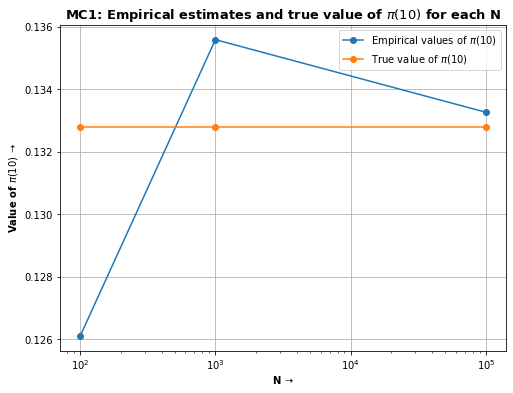

In [63]:
# Plotting empirical estimates and true value of pi(10) for MC1

plt.figure(figsize = (8,6))
plt.semilogx(N_list, empiricals_pi10_1, 'o-', 
             label = "Empirical values of $\pi(10)$")
plt.semilogx(N_list, [pi1[9] for i in N_list], 'o-', 
             label = "True value of $\pi(10)$")
plt.grid(True)
plt.legend()
plt.title("MC1: Empirical estimates and true value of $\pi(10)$ for each N", 
          fontweight = 'bold', fontsize = 13)
plt.xlabel("N \u279d", fontweight = 'bold')
plt.ylabel("Value of $\pi(10)$ \u279d", fontweight = 'bold')
plt.show()

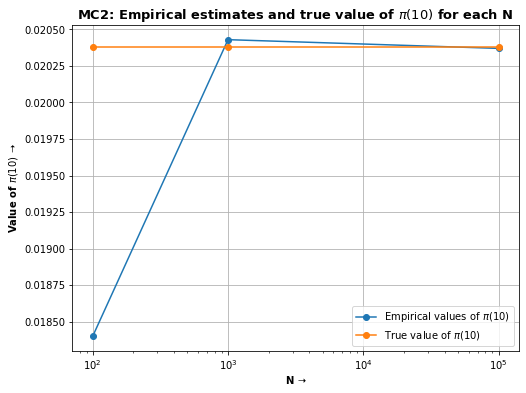

In [64]:
# Plotting empirical estimates and true value of pi(10) for MC2

plt.figure(figsize = (8,6))
plt.semilogx(N_list, empiricals_pi10_2, 'o-', 
             label = "Empirical values of $\pi(10)$")
plt.semilogx(N_list, [pi2[9] for i in N_list], 'o-', 
             label = "True value of $\pi(10)$")
plt.grid(True)
plt.legend()
plt.title("MC2: Empirical estimates and true value of $\pi(10)$ for each N", 
          fontweight = 'bold', fontsize = 13)
plt.xlabel("N \u279d", fontweight = 'bold')
plt.ylabel("Value of $\pi(10)$ \u279d", fontweight = 'bold')
plt.show()

- In both MC1 and MC2, **the empirical estimate of $\pi(10)$ becomes more accurate as we increase the value of $N$.**
- This is expected since, here, the stationary distribution is also the limiting distribution (owing to the finite irreducible and hence positive recurrent nature of the DTMC). Therefore, as we take higher number of steps, we reach closer and closer to limiting behaviour, which matches with the stationary distribution $\pi$.

###(c)

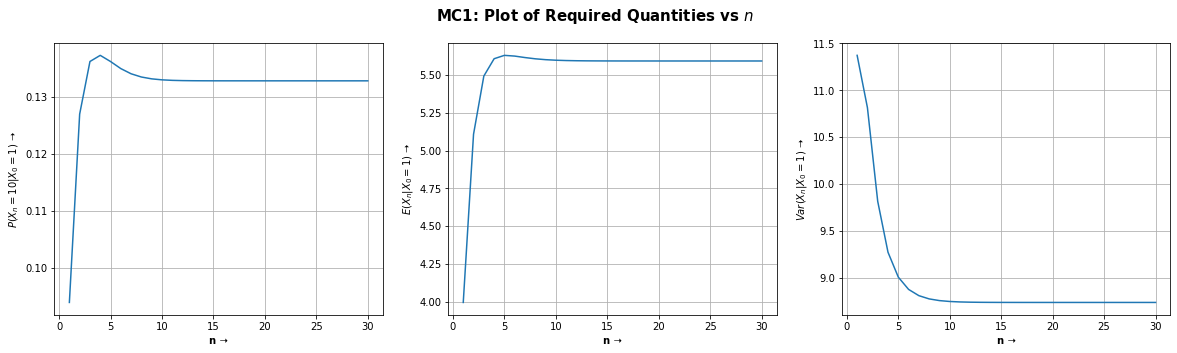

In [65]:
# MC1: Numerically computing P(Xn=10|X0=1), E(Xn|X0=1), Var(Xn|X0=1) for values
# of n from 1 to 100 (proves to be enough for our analysis)

# Lists to store the 3 quantities as n increases
probs10 = []
expectation1 = []
variance1 = []

# Initialising N-step TPM to identity matrix (corresponding to 0 steps)
n_step_tpm = np.eye(len(state_space1))
N = 100

for n in range(1,N):
    n_step_tpm = np.matmul(n_step_tpm, mc1_tpm)             # P(n) = P(n-1)*P

    # Storing n-step probability of going from state 1 to state 10
    probs10.append(n_step_tpm[0,9])                    

    # Calculating expectation by dot-producting each state with n-step 
    # probabilities of going to that state from state 1, and storing it
    E_Xn = np.matmul(state_space1+1, n_step_tpm[0].T)  
    expectation1.append(E_Xn)

    # Calculating and storing variance similarly using dot-product, and the result
    # Var(X) = E(X^2) - (E(X))^2
    varnce = np.matmul((state_space1+1)**2, n_step_tpm[0].T) - E_Xn**2
    variance1.append(varnce)

# Plotting the three quantities as n increases (upto n = 30)

fig, ax = plt.subplots(1, 3, figsize = (20,5))
ax[0].plot(range(1,31), probs10[:30])
ax[0].set_xlabel('n \u279d', fontweight = 'bold')
ax[0].set_ylabel('$P(X_n = 10 | X_0 = 1)$ \u279d', fontweight = 'bold')
ax[0].grid(True)

ax[1].plot(range(1,31), expectation1[:30])
ax[1].set_xlabel('n \u279d', fontweight = 'bold')
ax[1].set_ylabel('$E(X_n | X_0 = 1)$ \u279d', fontweight = 'bold')
ax[1].grid(True)

ax[2].plot(range(1,31), variance1[:30])
ax[2].set_xlabel('n \u279d', fontweight = 'bold')
ax[2].set_ylabel('$Var(X_n | X_0 = 1)$ \u279d', fontweight = 'bold')
ax[2].grid(True)

fig.suptitle("MC1: Plot of Required Quantities vs $n$", fontweight = 'bold', 
             fontsize = 15)
plt.show()

###(d)

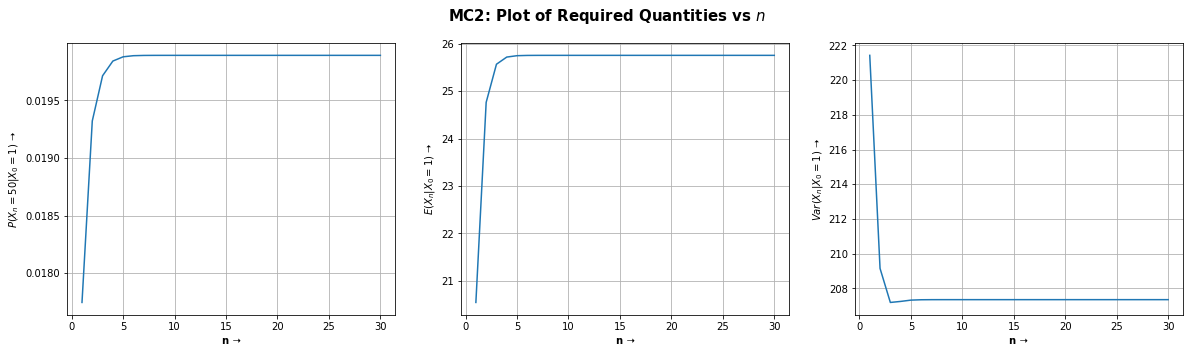

In [66]:
# MC2: Numerically computing P(Xn=50|X0=1), E(Xn|X0=1), Var(Xn|X0=1) for values
# of n from 1 to 100 (proves to be enough for our analysis)

# Lists to store the 3 quantities as n increases
probs50 = []
expectation2 = []
variance2 = []

# Initialising N-step TPM to identity matrix (corresponding to 0 steps)
n_step_tpm = np.eye(len(state_space2))
N = 100

for n in range(1,N):
    n_step_tpm = np.matmul(n_step_tpm, mc2_tpm)             # P(n) = P(n-1)*P

    # Storing n-step probability of going from state 1 to state 50
    probs50.append(n_step_tpm[0,49])

    # Calculating expectation by dot-producting each state with n-step 
    # probabilities of going to that state from state 1, and storing it
    E_Xn = np.matmul(state_space2+1, n_step_tpm[0].T)
    expectation2.append(E_Xn)

    # Calculating and storing variance similarly using dot-product, and the result
    # Var(X) = E(X^2) - (E(X))^2
    varnce = np.matmul((state_space2+1)**2, n_step_tpm[0].T) - E_Xn**2
    variance2.append(varnce)

# Plotting the three quantities as n increases (upto n = 30)

fig, ax = plt.subplots(1, 3, figsize = (20,5))
ax[0].plot(range(1,31), probs50[:30])
ax[0].set_xlabel('n \u279d', fontweight = 'bold')
ax[0].set_ylabel('$P(X_n = 50 | X_0 = 1)$ \u279d', fontweight = 'bold')
ax[0].grid(True)

ax[1].plot(range(1,31), expectation2[:30])
ax[1].set_xlabel('n \u279d', fontweight = 'bold')
ax[1].set_ylabel('$E(X_n | X_0 = 1)$ \u279d', fontweight = 'bold')
ax[1].grid(True)

ax[2].plot(range(1,31), variance2[:30])
ax[2].set_xlabel('n \u279d', fontweight = 'bold')
ax[2].set_ylabel('$Var(X_n | X_0 = 1)$ \u279d', fontweight = 'bold')
ax[2].grid(True)

fig.suptitle("MC2: Plot of Required Quantities vs $n$", fontweight = 'bold', fontsize = 15)
plt.show()

###Interpretation Questions:

#### 1, 2. 

Let us calculate the limiting quantities and subsequently, the relative error in order to answer these questions.

In [67]:
# Calculation of limiting values using stationary distributions

limiting_prob10 = pi1[9]
limiting_expectation1 = np.matmul(state_space1+1, pi1)
limiting_variance1 = np.matmul((state_space1+1)**2, pi1.T) - limiting_expectation1**2

limiting_prob50 = pi2[49]
limiting_expectation2 = np.matmul(state_space2+1, pi2)
limiting_variance2 = np.matmul((state_space2+1)**2, pi2.T) - limiting_expectation2**2

Answering the question for MC1,

In [68]:
# MC1: Printing whether or not the relative error of required quantities is < 1% for first 30 time steps

print(abs(probs10[:30] - limiting_prob10)/limiting_prob10 < 0.01)
print(abs(expectation1[:30] - limiting_expectation1)/limiting_expectation1 < 0.01)
print(abs(variance1[:30] - limiting_variance1)/limiting_variance1 < 0.01)

[False False False False False False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
[False False False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
[False False False False False False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]


From observation, we see that, for $< 1\%$ relative error:
- Required time step for $P(X_n = 10 | X_0 = 1)$ is $7$.
- Required time step for $E(X_n | X_0 = 1)$ is $4$.
- Required time step for $Var(X_n | X_0 = 1)$ is $7$.

At first glance, it may seem that the time step for which the expectation error drops below a certain tolerance is earlier than for the other two quantities. However, upon observing the plot of $E(X_n | X_0 = 1)$ vs $n$ in part $(c)$, we see that this expectation quantity overshoots and then falls back to the limiting value.

The expectation error drops below $1\%$ earlier than the other two quantities in the process of overshooting, and STAYS there **purely by chance** as time step increases, as the overshoot is not large enough by randomness of my TPM. If the tolerance were smaller, the time step when the expectation value stabilises within the tolerance limits would be more or less the same as for the other two quantities.

This can be verified by printing the same truth masks as above, but for a smaller relative error of $0.3\%$.

In [69]:
# MC1: Printing whether or not the relative error of required quantities is < 0.3% for first 30 time steps

print(abs(probs10[:30] - limiting_prob10)/limiting_prob10 < 0.003)
print(abs(expectation1[:30] - limiting_expectation1)/limiting_expectation1 < 0.003)
print(abs(variance1[:30] - limiting_variance1)/limiting_variance1 < 0.003)

[False False False False False False False False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
[False False False  True False False False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
[False False False False False False False False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]


Now, for $< 0.3\%$ relative error:
- Required time step for $P(X_n = 10 | X_0 = 1)$ is $9$.
- Required time step for $E(X_n | X_0 = 1)$ is $8$.
- Required time step for $Var(X_n | X_0 = 1)$ is $9$.

**indicating almost the same time step for all quantities.**

<br>

We see above that the expectation value comes within $0.3\%$ of the limiting value for a brief while as it overshoots (at time step 4), then shoots above it, and finally stabilises within the tolerance limits at nearly the same time step as the other two quantities.

**Therefore, in conclusion, all the quantities do NOT stabilise within $1\%$ of the limiting value at the same time step (expectation stabilises earlier), but this is simply because of the TPM and the chosen value of relative error. This answer is specific to the given $1\%$ relative error magnitude.** If we choose a smaller relative error, we see that all the quantities do in fact stabilise within the limiting value at nearly the same time step (indicative of general behaviour).

_______________________________________________________

Now, similarly for MC2,

In [70]:
# MC2: Printing whether or not the relative error of required quantities is < 1% for first 30 time steps

print(abs(probs50[:29] - limiting_prob50)/limiting_prob50 < 0.01)
print(abs(expectation2[:29] - limiting_expectation2)/limiting_expectation2 < 0.01)
print(abs(variance2[:29] - limiting_variance2)/limiting_variance2 < 0.01)

[False False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]
[False False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]
[False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]


From observation, we see that, for $< 1\%$ relative error:
- Required time step for $P(X_n = 50 | X_0 = 1)$ is $3$.
- Required time step for $E(X_n | X_0 = 1)$ is $3$.
- Required time step for $Var(X_n | X_0 = 1)$ is $2$.

Here, no phenomenon such as in the case of MC1 occurs, and it is clear that **all quantities stabilise within the $1\%$ relative error tolerance at nearly the same time step.**

____________________________________________________________________